***Import Libraries***

In [743]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
! pip install numpy


In [744]:
import pandas as pd

In [745]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

load dataset

In [747]:
data = pd.read_csv(r"C:\Users\renef\OneDrive\Desktop\project_E_SHOP\Dataset_ecommerce.csv")

In [748]:
data.head(5)

InvoiceNo          InvoiceDate  CustomerID StockCode  Description  Quantity  \
0    536365  2010-12-01 08:26:00     17850.0    SC1734  Electronics        65   
1    536365  2010-12-01 08:26:00     17850.0    SC2088    Furniture        95   
2    536365  2010-12-01 08:26:00     17850.0    SC3463        Books        78   
3    536365  2010-12-01 08:26:00     17850.0    SC6228         Toys        15   
4    536365  2010-12-01 08:26:00     17850.0    SC2149         Toys        50   

   UnitPrice       Country  
0      10.23         Egypt  
1      19.61          Mali  
2      61.49          Mali  
3      24.73  South Africa  
4      38.83        Rwanda

In [749]:
#checking for missing values
data.isnull().sum()


InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [750]:
#drop missing values
data.dropna(inplace = True)

In [751]:
# check for info on dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [752]:
#convert to datatime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

**EXPLORATORY DATA ANALYSIS**

**Analysis by country**

In [755]:
quantity_by_country = data.groupby(["Country"])["Quantity"].sum()


In [756]:
type(quantity_by_country)


pandas.core.series.Series

In [757]:
quantity_by_country = quantity_by_country.sort_values(ascending=False).reset_index()


In [758]:
quantity_by_country = quantity_by_country.sort_values(by="Quantity", ascending=False).reset_index(drop=True)


In [759]:
quantity_by_country

Country  Quantity
0            Togo    741223
1    South Africa    740589
2   Cote d'Ivoire    740229
3         Nigeria    739708
4           Libya    739206
5           Benin    738133
6        Zimbabwe    737522
7         Somalia    736219
8         Algeria    736181
9    Sierra Leone    735477
10     Mozambique    735416
11          Ghana    735354
12          Sudan    734158
13        Senegal    733968
14         Rwanda    733511
15        Tunisia    733082
16       Ethiopia    732940
17        Morocco    732594
18           Mali    732358
19          Kenya    732247
20       Cameroon    730881
21          Egypt    729299
22   Burkina Faso    728332
23     Madagascar    726297
24          Niger    725841
25       Tanzania    725664
26         Zambia    725152
27         Uganda    724525

In [760]:
quantity_by_country.head(3)

Country  Quantity
0           Togo    741223
1   South Africa    740589
2  Cote d'Ivoire    740229

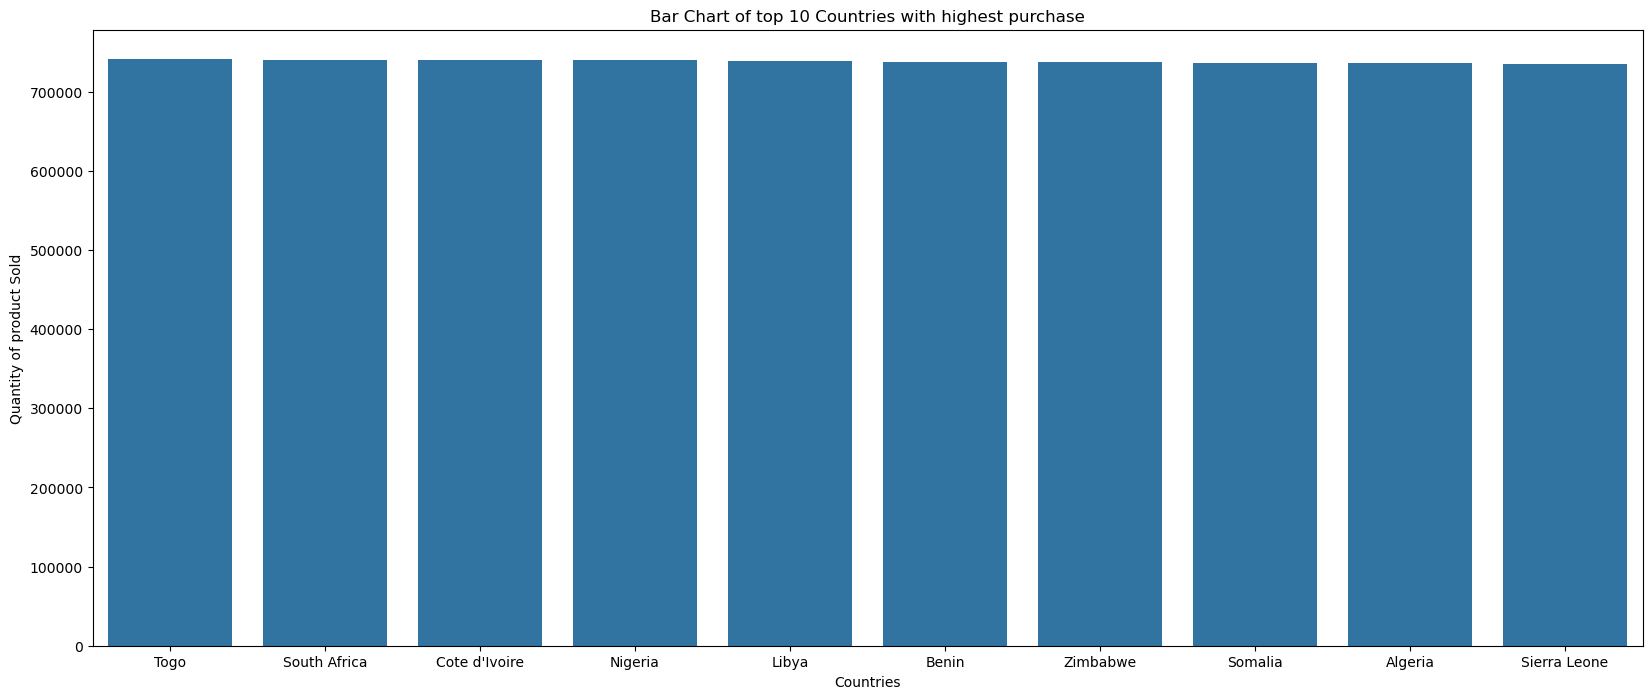

In [761]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x = "Country", y = "Quantity", data = top_10_country)

plt.xlabel("Countries")
plt.ylabel("Quantity of product Sold")
plt.title("Bar Chart of top 10 Countries with highest purchase")
plt.show()


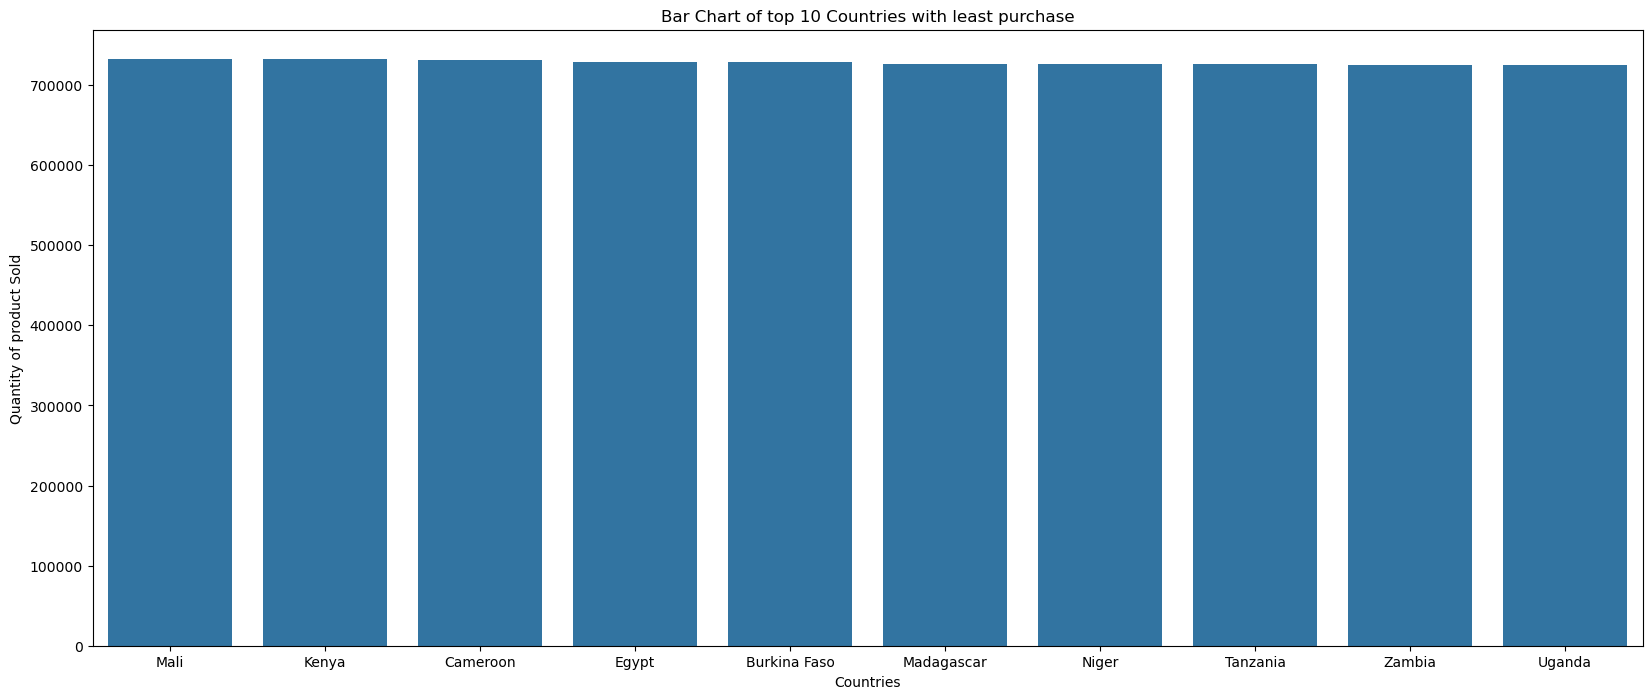

In [762]:
# visualise countries where least number product are sold
least_10_country = quantity_by_country.tail(10)
plt.figure(figsize=(20, 8))
ax = sns.barplot(x = "Country", y = "Quantity", data = least_10_country)

plt.xlabel("Countries")
plt.ylabel("Quantity of product Sold")
plt.title("Bar Chart of top 10 Countries with least purchase")
plt.show()


**ANALYSIS OF COUNTRIES AND NUMBER OF CUSTOMERS**

In [767]:
country_to_customer = data.groupby(["Country"])["CustomerID"].nunique().reset_index()

In [780]:
country_to_customer


Country  CustomerID
0         Algeria        3043
1           Benin        3054
2    Burkina Faso        3049
3        Cameroon        3029
4   Cote d'Ivoire        3026
5           Egypt        3029
6        Ethiopia        3035
7           Ghana        3035
8           Kenya        3009
9           Libya        3030
10     Madagascar        3031
11           Mali        3044
12        Morocco        2993
13     Mozambique        3072
14          Niger        3039
15        Nigeria        3051
16         Rwanda        3018
17        Senegal        3040
18   Sierra Leone        3046
19        Somalia        3008
20   South Africa        3026
21          Sudan        3036
22       Tanzania        3035
23           Togo        3053
24        Tunisia        3028
25         Uganda        2981
26         Zambia        3036
27       Zimbabwe        3036

In [785]:
country_to_customer = country_to_customer.sort_values("CustomerID" , ascending = False).reset_index()

In [787]:
country_to_customer.head(3)

index     Country  CustomerID
0     13  Mozambique        3072
1      1       Benin        3054
2     23        Togo        3053

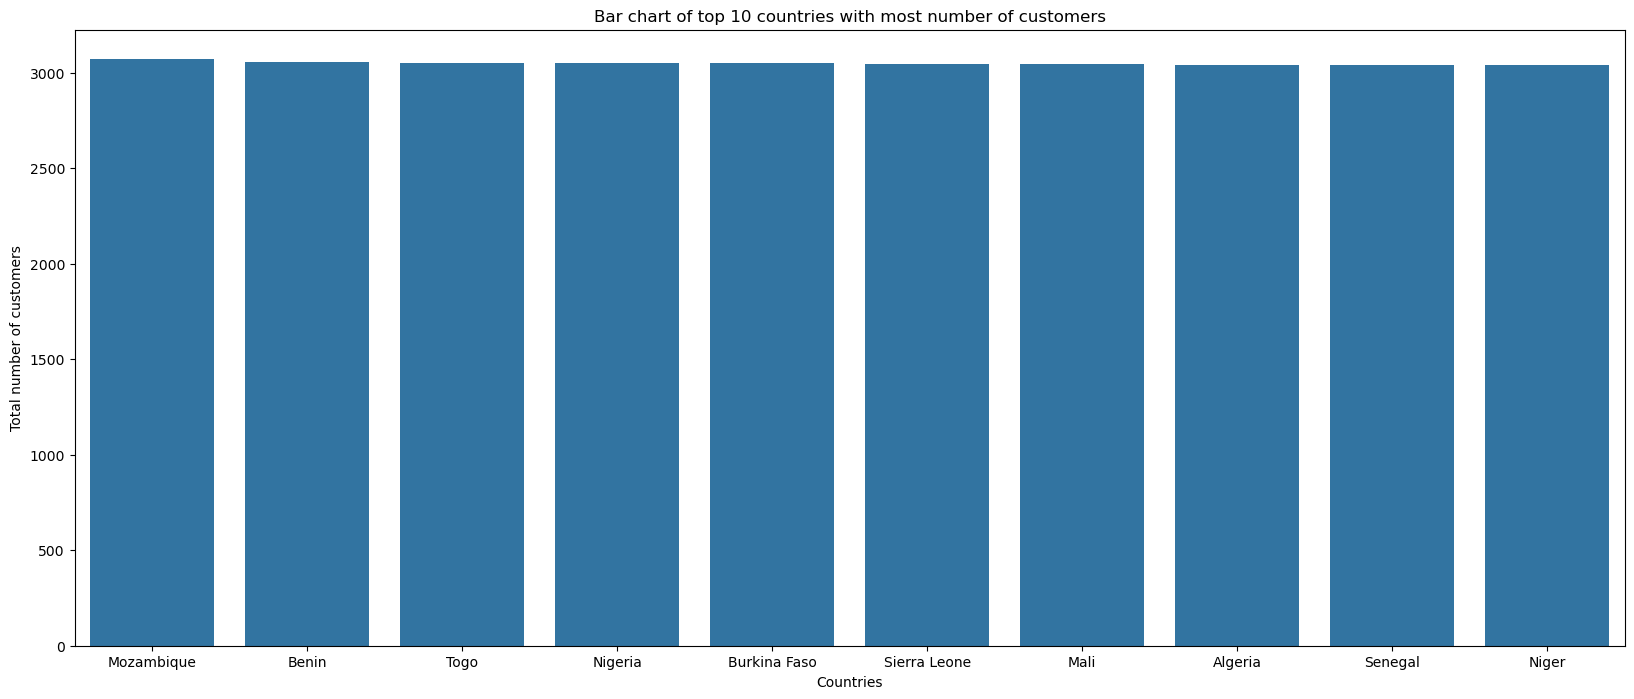

In [789]:
# draw a plot of top 10 countries with most number of customers
top_countries_to_customer =  country_to_customer.head(10)

plt.figure(figsize = (20,8))
sns.barplot(x = "Country", y = "CustomerID",data = top_countries_to_customer)

plt.xlabel("Countries")
plt.ylabel("Total number of customers")
plt.title("Bar chart of top 10 countries with most number of customers")
plt.show()


**SALES TREND VISUALIZATION**

In [792]:
monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period('M'))["Quantity"].sum()

In [794]:
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

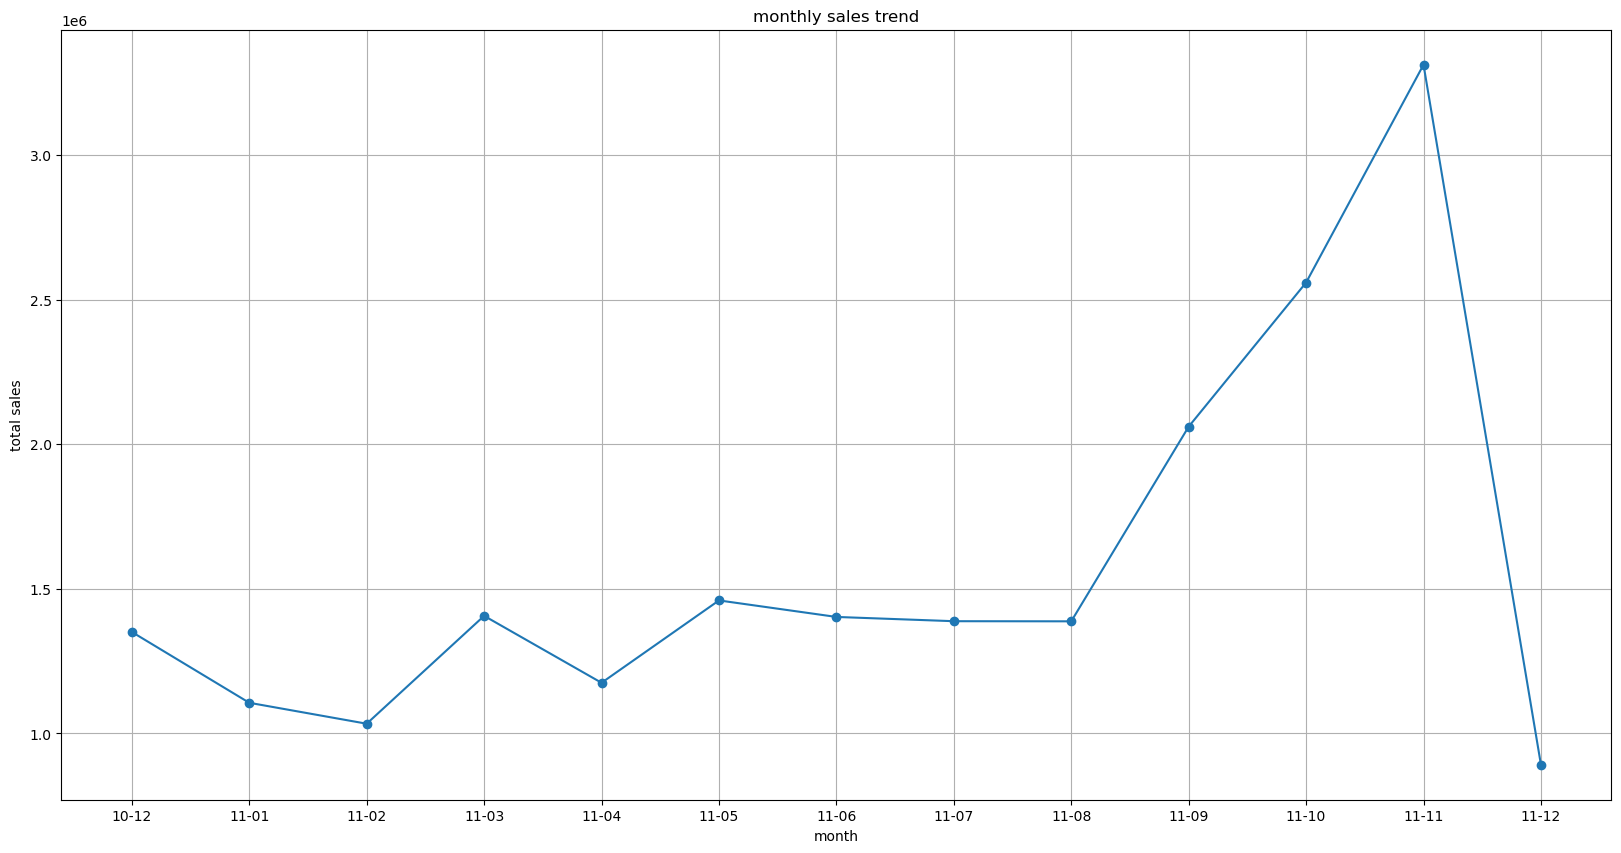

In [796]:
#create a_line plot
plt.figure(figsize = (20,10))
plt.plot(monthly_sales.index.strftime("%y-%m"), monthly_sales.values , marker = 'o' , linestyle = '-')
plt.xlabel("month")
plt.ylabel("total sales")
plt.title("monthly sales trend")
plt.grid(True)
plt.show()

**COHORT ANALYSIS**

In [799]:
data.head()

InvoiceNo         InvoiceDate  CustomerID StockCode  Description  Quantity  \
0    536365 2010-12-01 08:26:00     17850.0    SC1734  Electronics        65   
1    536365 2010-12-01 08:26:00     17850.0    SC2088    Furniture        95   
2    536365 2010-12-01 08:26:00     17850.0    SC3463        Books        78   
3    536365 2010-12-01 08:26:00     17850.0    SC6228         Toys        15   
4    536365 2010-12-01 08:26:00     17850.0    SC2149         Toys        50   

   UnitPrice       Country  
0      10.23         Egypt  
1      19.61          Mali  
2      61.49          Mali  
3      24.73  South Africa  
4      38.83        Rwanda

In [801]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
    

In [803]:
data["InvoiceDate"] = data["InvoiceDate"].apply(get_month)

In [804]:
data.head()

InvoiceNo InvoiceDate  CustomerID StockCode  Description  Quantity  \
0    536365  2010-12-01     17850.0    SC1734  Electronics        65   
1    536365  2010-12-01     17850.0    SC2088    Furniture        95   
2    536365  2010-12-01     17850.0    SC3463        Books        78   
3    536365  2010-12-01     17850.0    SC6228         Toys        15   
4    536365  2010-12-01     17850.0    SC2149         Toys        50   

   UnitPrice       Country  
0      10.23         Egypt  
1      19.61          Mali  
2      61.49          Mali  
3      24.73  South Africa  
4      38.83        Rwanda

In [950]:
# Calculate SalePrice
data["saleprice"] = data["Quantity"] * data["UnitPrice"]


In [952]:
# Display the updated DataFrame
data


InvoiceNo InvoiceDate  CustomerID StockCode  Description  Quantity  \
0         536365  2010-12-01     17850.0    SC1734  Electronics        65   
1         536365  2010-12-01     17850.0    SC2088    Furniture        95   
2         536365  2010-12-01     17850.0    SC3463        Books        78   
3         536365  2010-12-01     17850.0    SC6228         Toys        15   
4         536365  2010-12-01     17850.0    SC2149         Toys        50   
...          ...         ...         ...       ...          ...       ...   
541904    581587  2011-12-01     12680.0    SC5440    Furniture        25   
541905    581587  2011-12-01     12680.0    SC3576       Cloths        94   
541906    581587  2011-12-01     12680.0    SC5283    Furniture        14   
541907    581587  2011-12-01     12680.0    SC1099    Cosmetics        45   
541908    581587  2011-12-01     12680.0    SC9276         Toys         6   

        UnitPrice       Country cohort date  cohort_index  SalePrice  \
0           10.23         Egypt  2010-12-01             1     664.95   
1           19.61          Mali  2010-12-01             1    1862.95   
2           61.49          Mali  2010-12-01             1    4796.22   
3           24.73  South Africa  2010-12-01             1     370.95   
4           38.83        Rwanda  2010-12-01             1    1941.50   
...           ...           ...         ...           ...        ...   
541904      36.53    Mozambique  2011-08-01             5     913.25   
541905      90.65       Tunisia  2011-08-01             5    8521.10   
541906      40.07       Somalia  2011-08-01             5     560.98   
541907      79.83       Senegal  2011-08-01             5    3592.35   
541908      46.62      Ethiopia  2011-08-01             5     279.72   

        saleprice  
0          664.95  
1         1862.95  
2         4796.22  
3          370.95  
4         1941.50  
...           ...  
541904     913.25  
541905    8521.10  
541906     560.98  
541907    3592.35  
541908     279.72  

[406829 rows x 12 columns]

In [954]:
def get_cohort_date(data):
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")
    return data["cohort date"]

In [956]:
data["cohort date"] = get_cohort_date(data)

In [958]:
data

InvoiceNo InvoiceDate  CustomerID StockCode  Description  Quantity  \
0         536365  2010-12-01     17850.0    SC1734  Electronics        65   
1         536365  2010-12-01     17850.0    SC2088    Furniture        95   
2         536365  2010-12-01     17850.0    SC3463        Books        78   
3         536365  2010-12-01     17850.0    SC6228         Toys        15   
4         536365  2010-12-01     17850.0    SC2149         Toys        50   
...          ...         ...         ...       ...          ...       ...   
541904    581587  2011-12-01     12680.0    SC5440    Furniture        25   
541905    581587  2011-12-01     12680.0    SC3576       Cloths        94   
541906    581587  2011-12-01     12680.0    SC5283    Furniture        14   
541907    581587  2011-12-01     12680.0    SC1099    Cosmetics        45   
541908    581587  2011-12-01     12680.0    SC9276         Toys         6   

        UnitPrice       Country cohort date  cohort_index  SalePrice  \
0           10.23         Egypt  2010-12-01             1     664.95   
1           19.61          Mali  2010-12-01             1    1862.95   
2           61.49          Mali  2010-12-01             1    4796.22   
3           24.73  South Africa  2010-12-01             1     370.95   
4           38.83        Rwanda  2010-12-01             1    1941.50   
...           ...           ...         ...           ...        ...   
541904      36.53    Mozambique  2011-08-01             5     913.25   
541905      90.65       Tunisia  2011-08-01             5    8521.10   
541906      40.07       Somalia  2011-08-01             5     560.98   
541907      79.83       Senegal  2011-08-01             5    3592.35   
541908      46.62      Ethiopia  2011-08-01             5     279.72   

        saleprice  
0          664.95  
1         1862.95  
2         4796.22  
3          370.95  
4         1941.50  
...           ...  
541904     913.25  
541905    8521.10  
541906     560.98  
541907    3592.35  
541908     279.72  

[406829 rows x 12 columns]

**COHORT INDEX**

In [961]:
def get_year_and_month(data, col):

    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

In [963]:
first_month, first_year = get_year_and_month(data, "cohort date")

In [965]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 406829, dtype: int32

In [967]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort date, Length: 406829, dtype: int32

In [969]:
latest_month, latest_year = get_year_month(data, "InvoiceDate")


In [971]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [973]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

**cohort index**

In [976]:
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff + 1
    return index
    

In [978]:
data["cohort_index"] = create_cohort_index(first_month, first_year,latest_month, latest_year)

In [980]:
data

InvoiceNo InvoiceDate  CustomerID StockCode  Description  Quantity  \
0         536365  2010-12-01     17850.0    SC1734  Electronics        65   
1         536365  2010-12-01     17850.0    SC2088    Furniture        95   
2         536365  2010-12-01     17850.0    SC3463        Books        78   
3         536365  2010-12-01     17850.0    SC6228         Toys        15   
4         536365  2010-12-01     17850.0    SC2149         Toys        50   
...          ...         ...         ...       ...          ...       ...   
541904    581587  2011-12-01     12680.0    SC5440    Furniture        25   
541905    581587  2011-12-01     12680.0    SC3576       Cloths        94   
541906    581587  2011-12-01     12680.0    SC5283    Furniture        14   
541907    581587  2011-12-01     12680.0    SC1099    Cosmetics        45   
541908    581587  2011-12-01     12680.0    SC9276         Toys         6   

        UnitPrice       Country cohort date  cohort_index  SalePrice  \
0           10.23         Egypt  2010-12-01             1     664.95   
1           19.61          Mali  2010-12-01             1    1862.95   
2           61.49          Mali  2010-12-01             1    4796.22   
3           24.73  South Africa  2010-12-01             1     370.95   
4           38.83        Rwanda  2010-12-01             1    1941.50   
...           ...           ...         ...           ...        ...   
541904      36.53    Mozambique  2011-08-01             5     913.25   
541905      90.65       Tunisia  2011-08-01             5    8521.10   
541906      40.07       Somalia  2011-08-01             5     560.98   
541907      79.83       Senegal  2011-08-01             5    3592.35   
541908      46.62      Ethiopia  2011-08-01             5     279.72   

        saleprice  
0          664.95  
1         1862.95  
2         4796.22  
3          370.95  
4         1941.50  
...           ...  
541904     913.25  
541905    8521.10  
541906     560.98  
541907    3592.35  
541908     279.72  

[406829 rows x 12 columns]

**COHORT TABLE**

In [983]:
cohort_info = data.groupby(["cohort date", 'cohort_index'])["CustomerID"].nunique().reset_index()

In [985]:
cohort_info.rename(columns = {"CustomerID" : "Number of customers"}, inplace = True)

In [987]:
cohort_info

cohort date  cohort_index  Number of customers
0   2010-12-01             1                  948
1   2010-12-01             2                  362
2   2010-12-01             3                  317
3   2010-12-01             4                  367
4   2010-12-01             5                  341
..         ...           ...                  ...
86  2011-10-01             2                   93
87  2011-10-01             3                   46
88  2011-11-01             1                  321
89  2011-11-01             2                   43
90  2011-12-01             1                   41

[91 rows x 3 columns]

In [989]:
cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of customers")
cohort_table.index = cohort_table.index.strftime("%B %Y")

In [991]:
cohort_table

cohort_index       1      2      3      4      5      6      7      8      9   \
cohort date                                                                     
December 2010   948.0  362.0  317.0  367.0  341.0  376.0  360.0  336.0  336.0   
January 2011    421.0  101.0  119.0  102.0  138.0  126.0  110.0  108.0  131.0   
February 2011   380.0   94.0   73.0  106.0  102.0   94.0   97.0  107.0   98.0   
March 2011      440.0   84.0  112.0   96.0  102.0   78.0  116.0  105.0  127.0   
April 2011      299.0   68.0   66.0   63.0   62.0   71.0   69.0   78.0   25.0   
May 2011        279.0   66.0   48.0   48.0   60.0   68.0   74.0   29.0    NaN   
June 2011       235.0   49.0   44.0   64.0   58.0   79.0   24.0    NaN    NaN   
July 2011       191.0   40.0   39.0   44.0   52.0   22.0    NaN    NaN    NaN   
August 2011     167.0   42.0   42.0   42.0   23.0    NaN    NaN    NaN    NaN   
September 2011  298.0   89.0   97.0   36.0    NaN    NaN    NaN    NaN    NaN   
October 2011    352.0   93.0   46.0    NaN    NaN    NaN    NaN    NaN    NaN   
November 2011   321.0   43.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
December 2011    41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

cohort_index       10     11     12     13  
cohort date                                 
December 2010   374.0  354.0  474.0  260.0  
January 2011    146.0  155.0   63.0    NaN  
February 2011   119.0   35.0    NaN    NaN  
March 2011       39.0    NaN    NaN    NaN  
April 2011        NaN    NaN    NaN    NaN  
May 2011          NaN    NaN    NaN    NaN  
June 2011         NaN    NaN    NaN    NaN  
July 2011         NaN    NaN    NaN    NaN  
August 2011       NaN    NaN    NaN    NaN  
September 2011    NaN    NaN    NaN    NaN  
October 2011      NaN    NaN    NaN    NaN  
November 2011     NaN    NaN    NaN    NaN  
December 2011     NaN    NaN    NaN    NaN

<Axes: xlabel='cohort_index', ylabel='cohort date'>

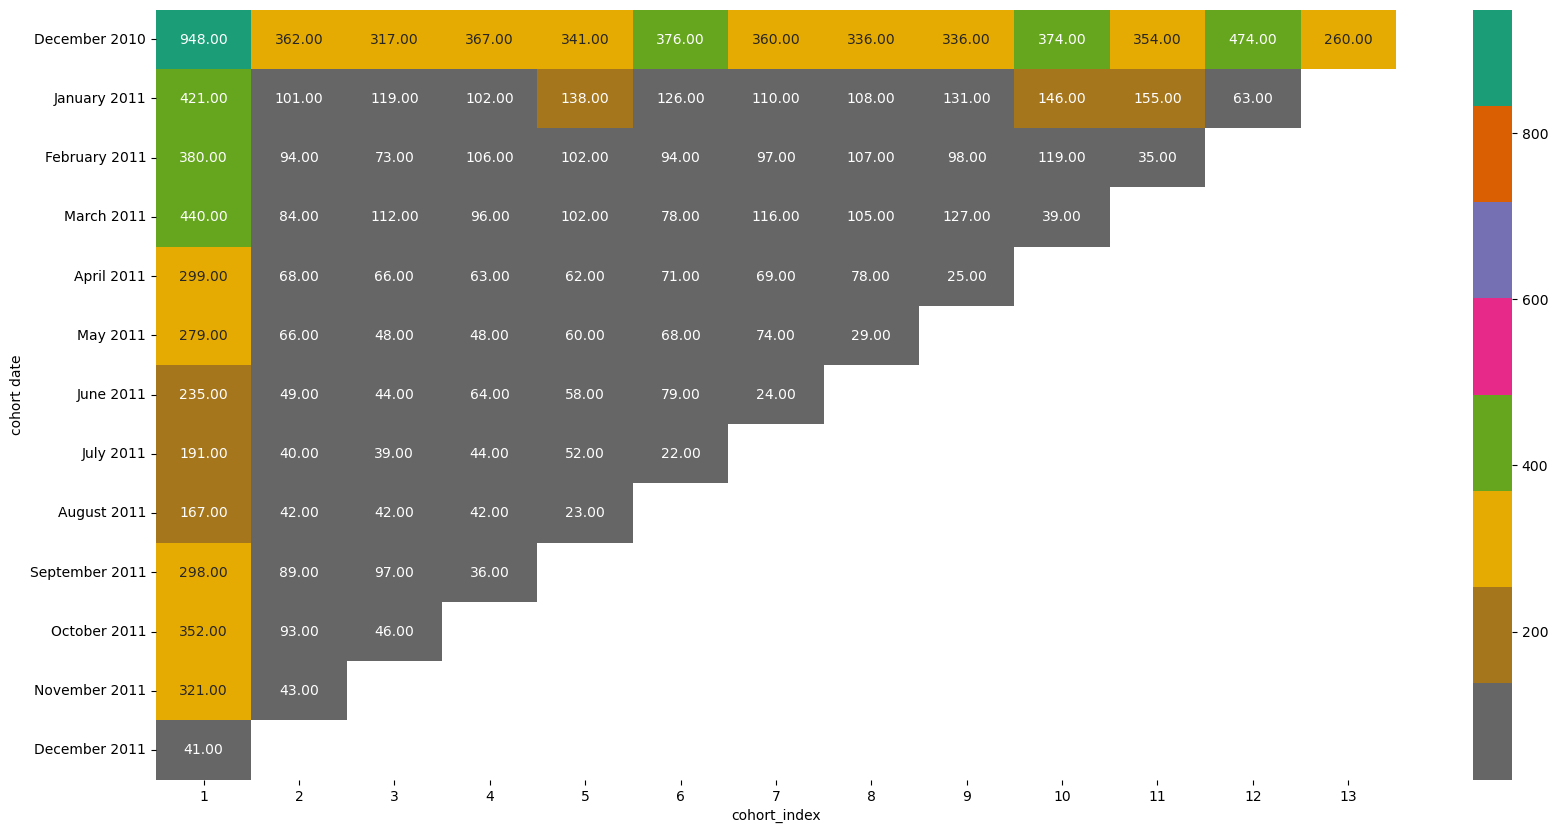

In [993]:
plt.figure(figsize = (20,10))
sns.heatmap(cohort_table, annot = True, cmap = "Dark2_r", fmt = ".2f")

In [995]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)

In [997]:
new_cohort_table

cohort_index     1         2         3         4         5         6   \
cohort date                                                             
December 2010   1.0  0.381857  0.334388  0.387131  0.359705  0.396624   
January 2011    1.0  0.239905  0.282660  0.242280  0.327791  0.299287   
February 2011   1.0  0.247368  0.192105  0.278947  0.268421  0.247368   
March 2011      1.0  0.190909  0.254545  0.218182  0.231818  0.177273   
April 2011      1.0  0.227425  0.220736  0.210702  0.207358  0.237458   
May 2011        1.0  0.236559  0.172043  0.172043  0.215054  0.243728   
June 2011       1.0  0.208511  0.187234  0.272340  0.246809  0.336170   
July 2011       1.0  0.209424  0.204188  0.230366  0.272251  0.115183   
August 2011     1.0  0.251497  0.251497  0.251497  0.137725       NaN   
September 2011  1.0  0.298658  0.325503  0.120805       NaN       NaN   
October 2011    1.0  0.264205  0.130682       NaN       NaN       NaN   
November 2011   1.0  0.133956       NaN       NaN       NaN       NaN   
December 2011   1.0       NaN       NaN       NaN       NaN       NaN   

cohort_index          7         8         9         10        11        12  \
cohort date                                                                  
December 2010   0.379747  0.354430  0.354430  0.394515  0.373418  0.500000   
January 2011    0.261283  0.256532  0.311164  0.346793  0.368171  0.149644   
February 2011   0.255263  0.281579  0.257895  0.313158  0.092105       NaN   
March 2011      0.263636  0.238636  0.288636  0.088636       NaN       NaN   
April 2011      0.230769  0.260870  0.083612       NaN       NaN       NaN   
May 2011        0.265233  0.103943       NaN       NaN       NaN       NaN   
June 2011       0.102128       NaN       NaN       NaN       NaN       NaN   
July 2011            NaN       NaN       NaN       NaN       NaN       NaN   
August 2011          NaN       NaN       NaN       NaN       NaN       NaN   
September 2011       NaN       NaN       NaN       NaN       NaN       NaN   
October 2011         NaN       NaN       NaN       NaN       NaN       NaN   
November 2011        NaN       NaN       NaN       NaN       NaN       NaN   
December 2011        NaN       NaN       NaN       NaN       NaN       NaN   

cohort_index          13  
cohort date               
December 2010   0.274262  
January 2011         NaN  
February 2011        NaN  
March 2011           NaN  
April 2011           NaN  
May 2011             NaN  
June 2011            NaN  
July 2011            NaN  
August 2011          NaN  
September 2011       NaN  
October 2011         NaN  
November 2011        NaN  
December 2011        NaN

<Axes: xlabel='cohort_index', ylabel='cohort date'>

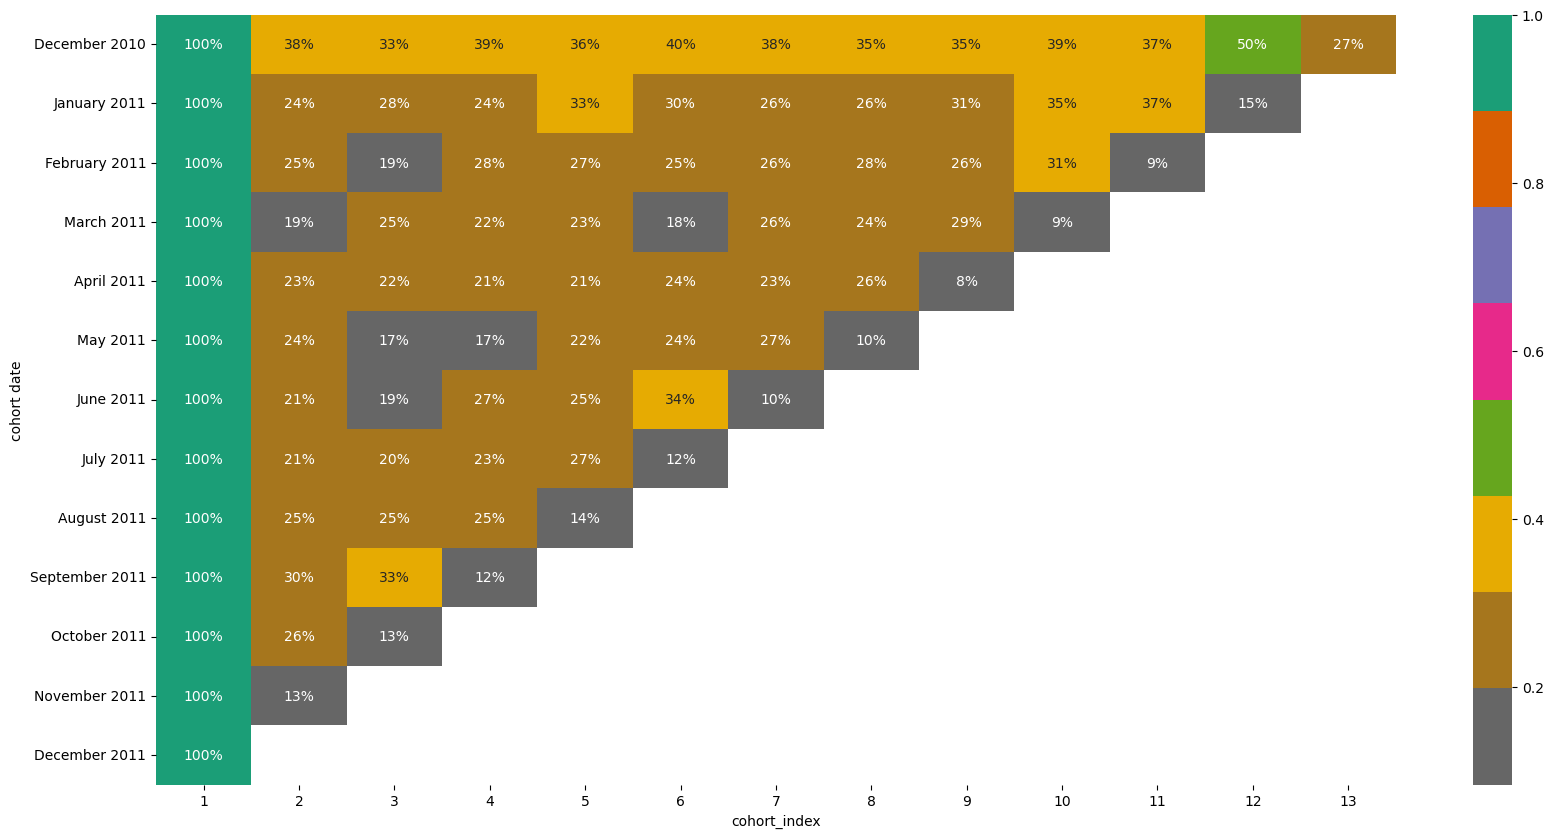

In [999]:
plt.figure(figsize = (20,10))
sns.heatmap(new_cohort_table, annot = True, cmap = "Dark2_r", fmt = ".0%")

**COHORT ANALLYSIS 3**

**Quantity bought**

In [1003]:
quantity_bought = data.groupby(["cohort date", "cohort_index"])["Quantity"].sum().reset_index()

In [1005]:
quantity_bought

cohort date  cohort_index  Quantity
0   2010-12-01             1   1350834
1   2010-12-01             2    546873
2   2010-12-01             3    462374
3   2010-12-01             4    613244
4   2010-12-01             5    510943
..         ...           ...       ...
86  2011-10-01             2    181888
87  2011-10-01             3     44776
88  2011-11-01             1    574330
89  2011-11-01             2     56021
90  2011-12-01             1     50955

[91 rows x 3 columns]

In [1007]:
quantity_table = quantity_bought.pivot(index = "cohort date", columns = ["cohort_index"], values= "Quantity")
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [1009]:
quantity_table

cohort_index           1         2         3         4         5         6   \
cohort date                                                                   
December 2010   1350834.0  546873.0  462374.0  613244.0  510943.0  636443.0   
January 2011     559013.0  121074.0  155931.0  120023.0  194675.0  166585.0   
February 2011    450020.0   74008.0   98850.0  122918.0  111386.0  104214.0   
March 2011       563434.0   74215.0  125519.0  119480.0  122078.0  107554.0   
April 2011       371021.0   71541.0   66410.0   65115.0   70639.0  105065.0   
May 2011         308885.0   55453.0   44637.0   45690.0   76473.0  118534.0   
June 2011        285867.0   47847.0   35516.0   76483.0   88504.0  127400.0   
July 2011        254889.0   25983.0   68721.0   69466.0   91529.0   26831.0   
August 2011      243542.0   80156.0  144849.0  141888.0   45405.0       NaN   
September 2011   420688.0  124681.0  135347.0   44631.0       NaN       NaN   
October 2011     598521.0  181888.0   44776.0       NaN       NaN       NaN   
November 2011    574330.0   56021.0       NaN       NaN       NaN       NaN   
December 2011     50955.0       NaN       NaN       NaN       NaN       NaN   

cohort_index          7         8         9         10        11         12  \
cohort date                                                                   
December 2010   597676.0  604504.0  600481.0  757806.0  725896.0  1165046.0   
January 2011    144835.0  149848.0  200661.0  258400.0  330607.0    76504.0   
February 2011   108442.0  135276.0  151180.0  145405.0   21787.0        NaN   
March 2011      139852.0  182259.0  212009.0   49685.0       NaN        NaN   
April 2011       97319.0  110572.0   27119.0       NaN       NaN        NaN   
May 2011         97156.0   41183.0       NaN       NaN       NaN        NaN   
June 2011        31264.0       NaN       NaN       NaN       NaN        NaN   
July 2011            NaN       NaN       NaN       NaN       NaN        NaN   
August 2011          NaN       NaN       NaN       NaN       NaN        NaN   
September 2011       NaN       NaN       NaN       NaN       NaN        NaN   
October 2011         NaN       NaN       NaN       NaN       NaN        NaN   
November 2011        NaN       NaN       NaN       NaN       NaN        NaN   
December 2011        NaN       NaN       NaN       NaN       NaN        NaN   

cohort_index          13  
cohort date               
December 2010   375469.0  
January 2011         NaN  
February 2011        NaN  
March 2011           NaN  
April 2011           NaN  
May 2011             NaN  
June 2011            NaN  
July 2011            NaN  
August 2011          NaN  
September 2011       NaN  
October 2011         NaN  
November 2011        NaN  
December 2011        NaN

<Axes: xlabel='cohort_index', ylabel='cohort date'>

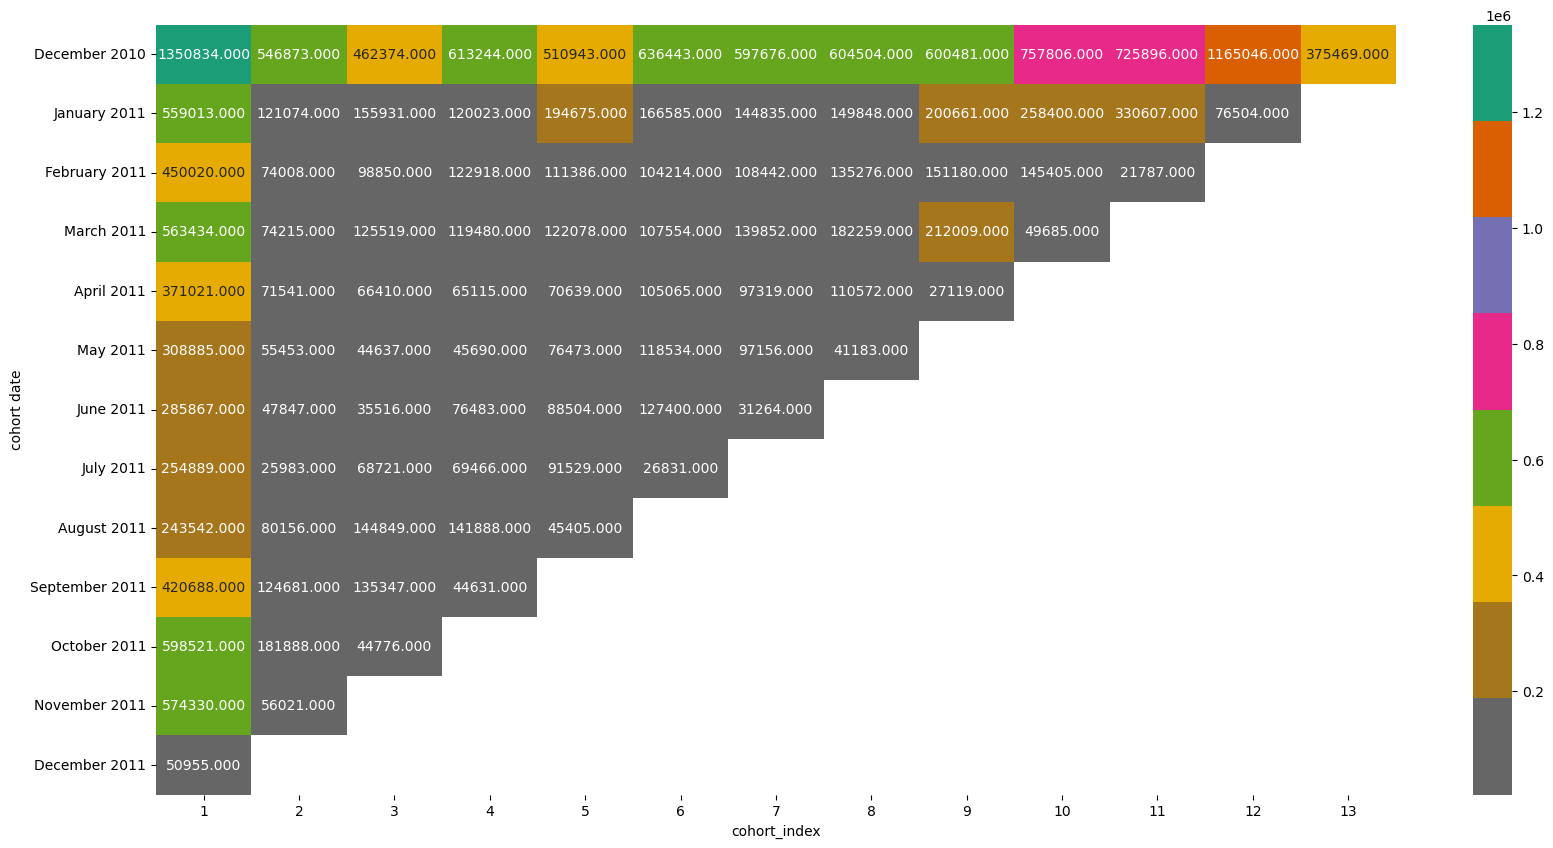

In [1011]:
plt.figure(figsize = (20,10))
sns.heatmap(quantity_table, annot = True, cmap = "Dark2_r", fmt = ".3f")

In [1012]:
quantity_bought = data.groupby(["cohort date", "cohort_index"])["Quantity"].mean().reset_index()

In [1015]:
quantity_bought

cohort date  cohort_index   Quantity
0   2010-12-01             1  50.310391
1   2010-12-01             2  50.259443
2   2010-12-01             3  50.351084
3   2010-12-01             4  50.635290
4   2010-12-01             5  50.628518
..         ...           ...        ...
86  2011-10-01             2  49.928081
87  2011-10-01             3  49.367144
88  2011-11-01             1  51.056094
89  2011-11-01             2  48.629340
90  2011-12-01             1  51.159639

[91 rows x 3 columns]

In [1017]:
quantity_table = quantity_bought.pivot(index = "cohort date", columns = ["cohort_index"], values= "Quantity")
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [1019]:
quantity_table

cohort_index           1          2          3          4          5   \
cohort date                                                             
December 2010   50.310391  50.259443  50.351084  50.635290  50.628518   
January 2011    50.676548  50.616221  50.758789  50.621257  50.908734   
February 2011   51.208466  49.736559  51.032525  50.334971  50.219116   
March 2011      50.527666  50.213126  50.247798  50.243902  50.114122   
April 2011      50.685929  49.854355  49.969902  50.127021  50.637276   
May 2011        50.745030  49.379341  50.153933  49.663043  51.186747   
June 2011       50.578025  50.955272  48.452933  50.550562  51.366222   
July 2011       50.734275  49.491429  50.791574  50.083634  49.771071   
August 2011     50.506429  49.848259  50.434889  51.038849  50.171271   
September 2011  50.424068  50.213854  49.778227  51.065217        NaN   
October 2011    50.389039  49.928081  49.367144        NaN        NaN   
November 2011   51.056094  48.629340        NaN        NaN        NaN   
December 2011   51.159639        NaN        NaN        NaN        NaN   

cohort_index           6          7          8          9          10  \
cohort date                                                             
December 2010   50.423309  50.526334  50.467858  50.182266  50.574346   
January 2011    50.373450  50.289931  50.436890  50.468058  49.942018   
February 2011   50.687743  49.180045  50.741185  50.919502  49.592428   
March 2011      50.613647  50.000715  51.081558  50.120331  50.441624   
April 2011      50.318487  50.294057  49.919639  51.071563        NaN   
May 2011        50.547548  49.926002  51.350374        NaN        NaN   
June 2011       50.878594  50.263666        NaN        NaN        NaN   
July 2011       50.720227        NaN        NaN        NaN        NaN   
August 2011           NaN        NaN        NaN        NaN        NaN   
September 2011        NaN        NaN        NaN        NaN        NaN   
October 2011          NaN        NaN        NaN        NaN        NaN   
November 2011         NaN        NaN        NaN        NaN        NaN   
December 2011         NaN        NaN        NaN        NaN        NaN   

cohort_index           11         12         13  
cohort date                                      
December 2010   50.546341  50.640963  50.677419  
January 2011    50.590207  50.531044        NaN  
February 2011   50.085057        NaN        NaN  
March 2011            NaN        NaN        NaN  
April 2011            NaN        NaN        NaN  
May 2011              NaN        NaN        NaN  
June 2011             NaN        NaN        NaN  
July 2011             NaN        NaN        NaN  
August 2011           NaN        NaN        NaN  
September 2011        NaN        NaN        NaN  
October 2011          NaN        NaN        NaN  
November 2011         NaN        NaN        NaN  
December 2011         NaN        NaN        NaN

<Axes: xlabel='cohort_index', ylabel='cohort date'>

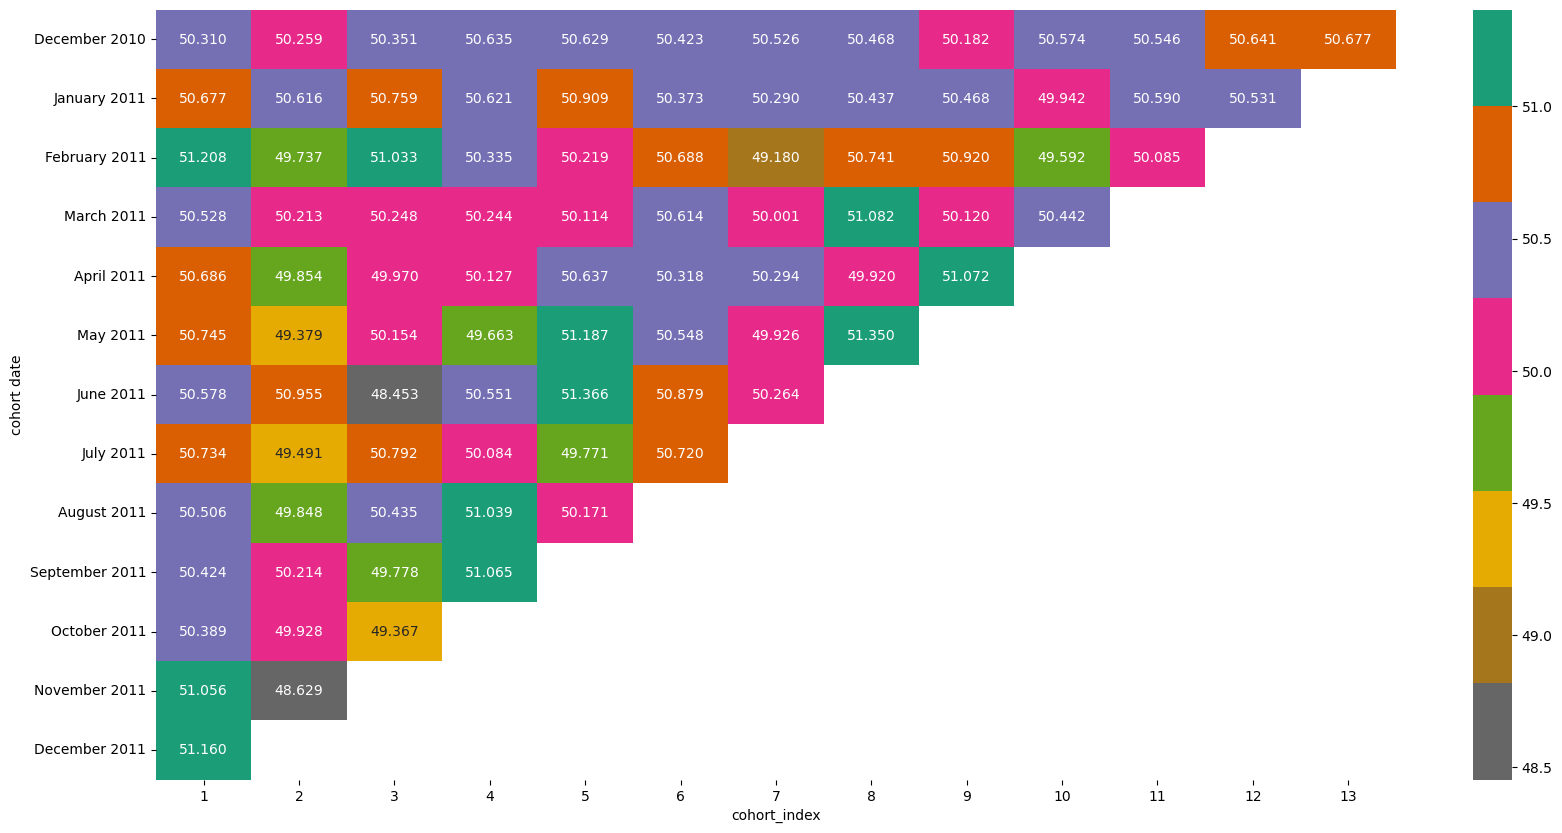

In [1021]:
plt.figure(figsize = (20,10))
sns.heatmap(quantity_table, annot = True, cmap = "Dark2_r", fmt = ".3f")

**PERFORM FEATURE ENGINEERING**

In [1060]:
!pip install yellowbrick


In [1064]:
import yellowbrick
print(yellowbrick.__version__)


1.5


In [1066]:
!pip install --upgrade yellowbrick


In [1068]:
from yellowbrick.cluster import KElbowVisualizer


In [1070]:
from yellowbrick.cluster import KElbowVisualizer


In [1032]:
data.sample(10)

InvoiceNo InvoiceDate  CustomerID StockCode       Description  \
32185     539044  2010-12-01     15727.0    SC5014           Jewelry   
406690    571824  2011-10-01     12472.0    SC7404         Cosmetics   
368482    568954  2011-09-01     13576.0    SC9246       Kitchenware   
532952    581003  2011-12-01     14911.0    SC3099              Toys   
255656    559358  2011-07-01     15675.0    SC6045       Electronics   
436539    574170  2011-11-01     16221.0    SC4838         Furniture   
306152    563737  2011-08-01     16261.0    SC8231  Sports Equipment   
159902    550408  2011-04-01     16746.0    SC1492            Cloths   
368961    569005  2011-09-01     16268.0    SC8401           Jewelry   
270566    560576  2011-07-01     17287.0    SC1454         Furniture   

        Quantity  UnitPrice     Country cohort date  cohort_index  SalePrice  \
32185          9      22.34    Cameroon  2010-12-01             1     201.06   
406690         2       2.26  Madagascar  2010-12-01            11       4.52   
368482        43      20.13      Zambia  2010-12-01            10     865.59   
532952        15      49.60     Tunisia  2010-12-01            13     744.00   
255656        62      39.94       Niger  2011-03-01             5    2476.28   
436539        26      54.40        Mali  2010-12-01            12    1414.40   
306152        62      89.35     Tunisia  2011-04-01             5    5539.70   
159902        55      78.17     Algeria  2010-12-01             5    4299.35   
368961        48      28.24    Ethiopia  2011-09-01             1    1355.52   
270566        85      87.61     Morocco  2010-12-01             8    7446.85   

        saleprice  
32185      201.06  
406690       4.52  
368482     865.59  
532952     744.00  
255656    2476.28  
436539    1414.40  
306152    5539.70  
159902    4299.35  
368961    1355.52  
270566    7446.85

In [1024]:
#group the dataframe by the CustomerID column
customer_data = data.groupby(["Country", "CustomerID"])

In [1026]:
#Calculate the total sales, order count, and average order value for each customer
total_sales = customer_data["saleprice"].sum()
order_count = customer_data["InvoiceDate"].size()
avg_order_value = total_sales / order_count

In [1028]:
#Create a new DataFrame with the aggregate results
results = pd.DataFrame({
    "TotalSales":total_sales,
    "OrderCount" : order_count,
    "AvgOrderValue" : avg_order_value
})

In [1030]:
#print the result
results.tail(10)

TotalSales  OrderCount  AvgOrderValue
Country  CustomerID                                       
Zimbabwe 18252.0       14990.52           8    1873.815000
         18257.0        5839.33           2    2919.665000
         18259.0        8699.08           2    4349.540000
         18260.0        2434.62           3     811.540000
         18263.0        7162.27           3    2387.423333
         18265.0        1286.88           1    1286.880000
         18272.0       10964.62           4    2741.155000
         18274.0        9490.96           3    3163.653333
         18283.0       55417.95          18    3078.775000
         18287.0        9066.19           3    3022.063333

In [1034]:
results.sample(10)

TotalSales  OrderCount  AvgOrderValue
Country      CustomerID                                       
Niger        12490.0       18335.65           7    2619.378571
Sierra Leone 16884.0        4157.16           1    4157.160000
Tanzania     14348.0        7633.40           2    3816.700000
Ghana        17469.0       26122.67           7    3731.810000
Sierra Leone 17885.0        5262.42           5    1052.484000
Algeria      15416.0       17769.87           7    2538.552857
Egypt        14936.0       56089.30          15    3739.286667
Mali         18229.0       15841.72           9    1760.191111
Ethiopia     13983.0        2211.88           3     737.293333
Libya        16150.0       12586.30           4    3146.575000

In [1036]:
results.shape

(84912, 3)

<Axes: xlabel='TotalSales', ylabel='Count'>

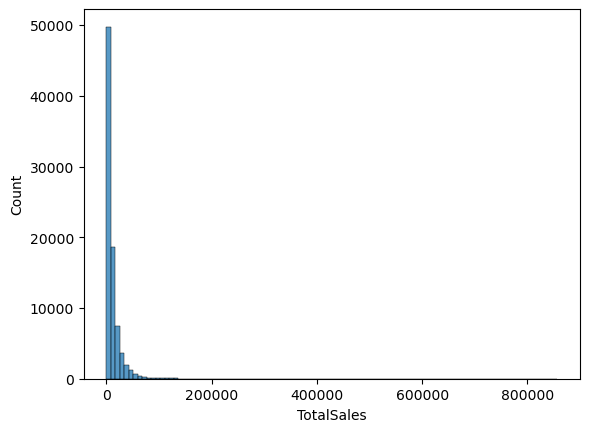

In [1038]:
import seaborn as sb
#visualize the distribution of the total sales features
sb.histplot(results["TotalSales"], bins = 100)
#plt.xscale("log")
            

In [1040]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler

In [1046]:
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(results),index=results.index,columns = results.columns)
print(x_scaled.describe())
print(x_scaled.head())

         TotalSales    OrderCount  AvgOrderValue
count  84912.000000  84912.000000   84912.000000
mean       0.014267      0.011737       0.255576
std        0.029919      0.030493       0.155533
min        0.000000      0.000000       0.000000
25%        0.003228      0.000000       0.149668
50%        0.007878      0.006192       0.239271
75%        0.016411      0.012384       0.330730
max        1.000000      1.000000       1.000000
                    TotalSales  OrderCount  AvgOrderValue
Country CustomerID                                       
Algeria 12347.0       0.010872    0.006192       0.310608
        12348.0       0.011315    0.000000       0.970189
        12349.0       0.003556    0.006192       0.101537
        12350.0       0.001665    0.000000       0.142724
        12352.0       0.007664    0.003096       0.328475


In [1054]:
x_scaled.head()

TotalSales  OrderCount  AvgOrderValue
Country CustomerID                                       
Algeria 12347.0       0.010872    0.006192       0.310608
        12348.0       0.011315    0.000000       0.970189
        12349.0       0.003556    0.006192       0.101537
        12350.0       0.001665    0.000000       0.142724
        12352.0       0.007664    0.003096       0.328475

C:\Users\renef\AppData\Local\Temp\ipykernel_17244\4026569638.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x,y,z,marker="o",cmap=cmap)


Text(0.5, 0.92, '3d visualization of our data')

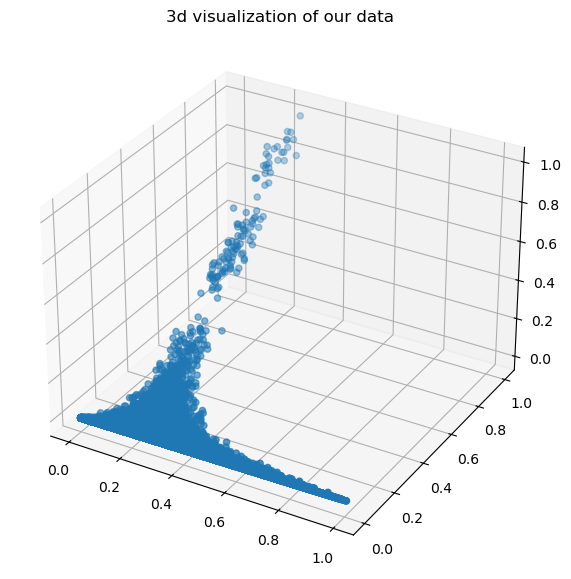

In [1052]:
#ploting new data points
y=x_scaled["TotalSales"]
x=x_scaled["AvgOrderValue"]
z=x_scaled["OrderCount"]
cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,marker="o",cmap=cmap)
ax.set_title("3d visualization of our data")

In [1074]:
#importing clustering algo,silheoute score & kelbow visualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


C:\Users\renef\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\renef\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\renef\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\renef\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

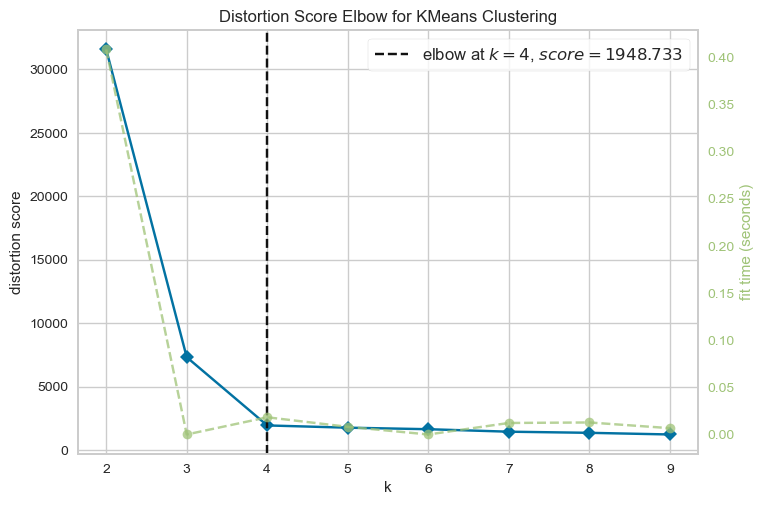

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1078]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Example dataset (replace with your own data)
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.0, random_state=42)

# Create a KMeans model
model = KMeans()

# Create the KElbowVisualizer
elbow_k = KElbowVisualizer(estimator=model, k=(2, 10))

# Fit the data to the visualizer
elbow_k.fit(X)

# Finalize and render the plot
elbow_k.show()


In [1082]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [1086]:
#applying kmeans clustering algorith
#k-means clustering
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters)
cluster.fit(x_scaled)

KMeans(n_clusters=4)

In [1088]:
#add cluster labels to the data
x_scaled["cluster"] = cluster.labels_

In [1094]:
from sklearn.cluster import KMeans

# Assuming you have a fitted KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
x_scaled["Cluster"] = kmeans.fit_predict(x_scaled)


In [1096]:
print(x_scaled.head())


                    TotalSales  OrderCount  AvgOrderValue  cluster  Cluster
Country CustomerID                                                         
Algeria 12347.0       0.010872    0.006192       0.310608        3        0
        12348.0       0.011315    0.000000       0.970189        2        2
        12349.0       0.003556    0.006192       0.101537        0        1
        12350.0       0.001665    0.000000       0.142724        0        1
        12352.0       0.007664    0.003096       0.328475        1        2


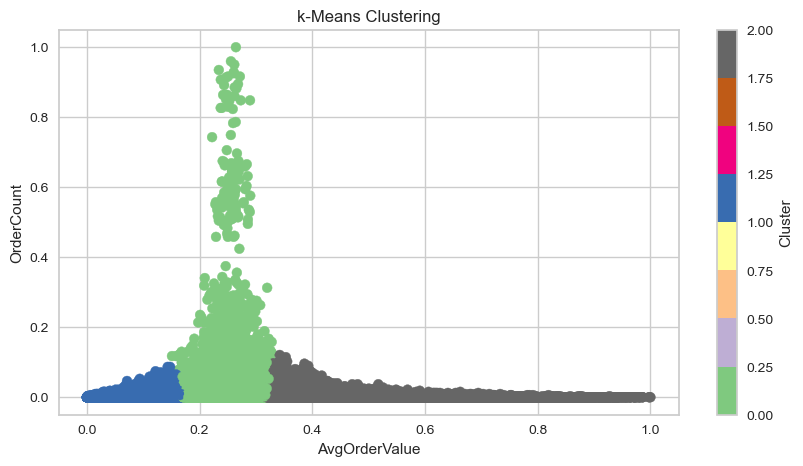

Silhouette Score: 0.8674


In [1098]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Visualize the cluster
plt.figure(figsize=(10, 5))
plt.scatter(
    x_scaled["AvgOrderValue"],
    x_scaled["OrderCount"],
    c=x_scaled["Cluster"],  # Ensure "Cluster" is the correct column name
    s=50,
    cmap="Accent",
)
plt.title("k-Means Clustering")
plt.xlabel("AvgOrderValue")
plt.ylabel("OrderCount")
plt.colorbar(label="Cluster")  # Adding a colorbar instead of legend for clarity
plt.show()

# Calculate the silhouette score
silhouette = silhouette_score(
    x_scaled.drop(columns=["Cluster"]),  # Exclude the cluster column when calculating
    x_scaled["Cluster"], 
    metric="euclidean"
)
print(f"Silhouette Score: {silhouette:.4f}")


In [1099]:
print(x_scaled.columns)


Index(['TotalSales', 'OrderCount', 'AvgOrderValue', 'cluster', 'Cluster'], dtype='object')


Text(0.5, 1.0, 'distribution of the new clusters')

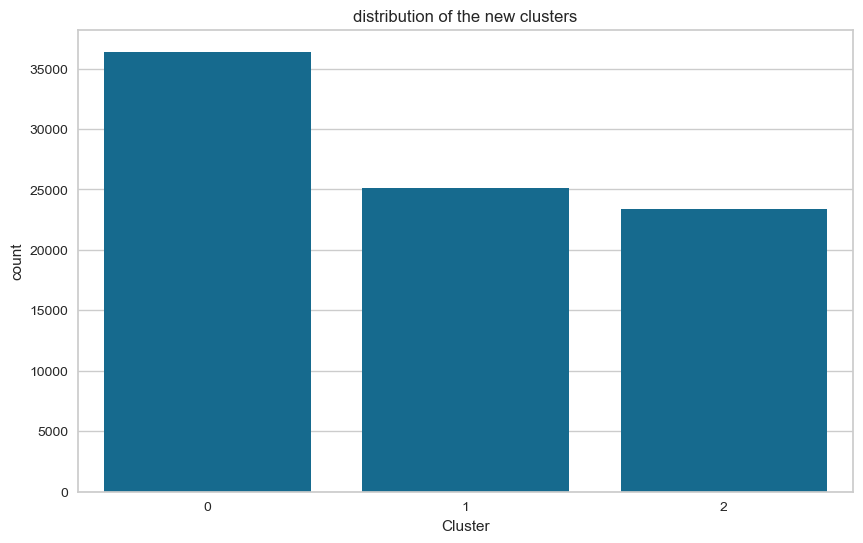

In [1102]:
#distribution of cluster
plt.figure(figsize=(10,6))
sb.countplot(x = x_scaled.Cluster)
plt.title("distribution of the new clusters")

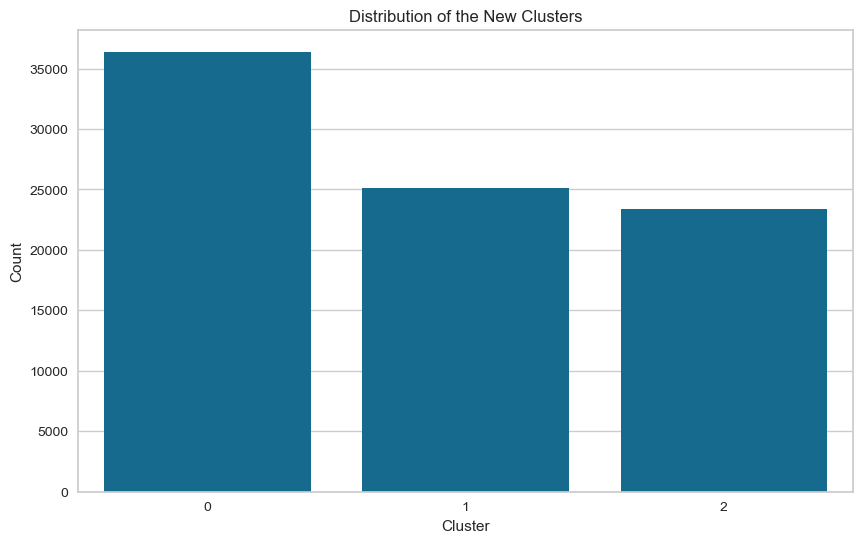

In [1106]:
import matplotlib.pyplot as plt
import seaborn as sb

# Distribution of clusters
plt.figure(figsize=(10, 6))
sb.countplot(x="Cluster", data=x_scaled)  # Only specify x for categorical data
plt.title("Distribution of the New Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


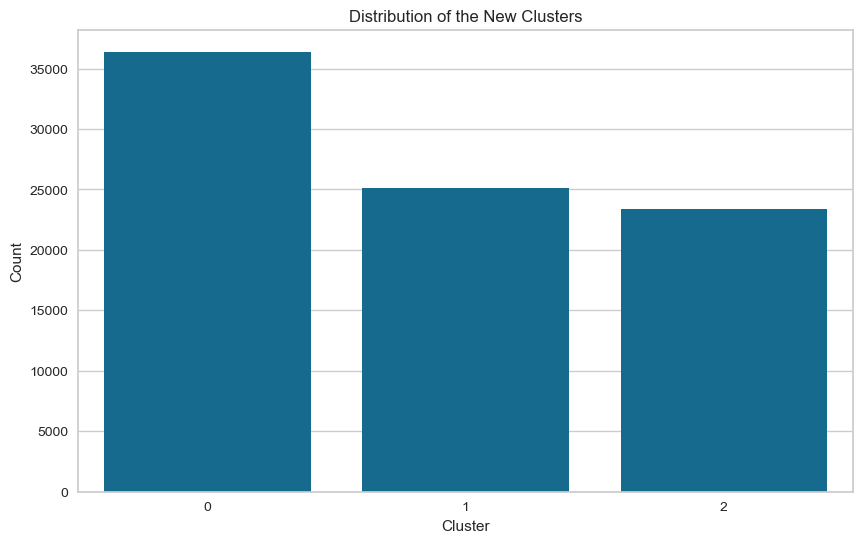

In [1120]:
import matplotlib.pyplot as plt
import seaborn as sb

# Distribution of clusters
plt.figure(figsize=(10, 6))
sb.countplot(x="Cluster", data=x_scaled)  # Specify only x for the cluster column
plt.title("Distribution of the New Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()
